In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA

In [110]:
# 데이터 불러오기
marketing = pd.read_csv('marketing_advanced.csv', encoding='cp949')

In [111]:
def check_df(dataframe, head=5):
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', 1000)
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.info())
    print("##################### Describe #####################")
    print(dataframe.describe(include='all'))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Head #####################")
    print(dataframe.head(head))

In [112]:
def uni_df(dataframe):
    for col in dataframe:
        print(col,dataframe[col].unique())
uni_df(marketing)

order_id ['e22acc9c116caa3f2b7121bbb380d08e' '3594e05a005ac4d06a72673270ef9ec9'
 'b33ec3b699337181488304f362a6b734' ... 'fdc45e6c7555e6cb3cc0daca2557dbe1'
 '94d3ee0bc2a0af9d4fa47a4d63616e8d' 'f79a35da168301ae56922475da21117b']
customer_id ['0000366f3b9a7992bf8c76cfdf3221e2' '0000b849f77a49e4a4ce2b2a4ca5be3f'
 '0000f46a3911fa3c0805444483337064' ... 'ffff371b4d645b6ecea244b27531430a'
 'ffff5962728ec6157033ef9805bacc48' 'ffffd2657e2aad2907e67c3e9daecbeb']
order_status ['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'unavailable'
 'approved']
order_purchase_timestamp ['2024-10-10 16:29' '2024-10-07 17:47' '2023-08-10 16:35' ...
 '2023-11-08 15:00' '2023-11-08 13:35' '2023-07-07 4:15']
order_approved_at ['2024-10-10 19:21' '2024-10-07 19:14' '2023-08-10 19:29' ...
 '2023-07-07 5:23' '2024-10-02 22:38' '2023-10-03 0:48']
order_delivered_timestamp ['2024-10-16 20:48' '2024-10-10 18:02' '2023-09-05 14:38' ...
 '2023-07-22 12:45' '2024-10-14 11:54' '2023-10-10 9:33']
order_estimated_d

In [113]:
check_df(marketing)

##################### Shape #####################
(104899, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       104899 non-null  object 
 1   customer_id                    104899 non-null  object 
 2   order_status                   104899 non-null  object 
 3   order_purchase_timestamp       104899 non-null  object 
 4   order_approved_at              104899 non-null  object 
 5   order_delivered_timestamp      102623 non-null  object 
 6   order_estimated_delivery_date  104899 non-null  object 
 7   age                            104899 non-null  int64  
 8   gender                         104899 non-null  object 
 9   country                        104899 non-null  object 
 10  payment_type                   104899 n

In [114]:
# 날짜형으로 변환할 컬럼 목록
date_cols = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_timestamp',
    'order_estimated_delivery_date'
]
for col in date_cols:
    marketing[col] = pd.to_datetime(marketing[col], errors='coerce')

In [115]:
check_df(marketing)

##################### Shape #####################
(104899, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104899 non-null  object        
 1   customer_id                    104899 non-null  object        
 2   order_status                   104899 non-null  object        
 3   order_purchase_timestamp       104899 non-null  datetime64[ns]
 4   order_approved_at              104899 non-null  datetime64[ns]
 5   order_delivered_timestamp      102623 non-null  datetime64[ns]
 6   order_estimated_delivery_date  104899 non-null  datetime64[ns]
 7   age                            104899 non-null  int64         
 8   gender                         104899 non-null  object        
 9   country                

In [116]:
uni_df(marketing)

order_id ['e22acc9c116caa3f2b7121bbb380d08e' '3594e05a005ac4d06a72673270ef9ec9'
 'b33ec3b699337181488304f362a6b734' ... 'fdc45e6c7555e6cb3cc0daca2557dbe1'
 '94d3ee0bc2a0af9d4fa47a4d63616e8d' 'f79a35da168301ae56922475da21117b']
customer_id ['0000366f3b9a7992bf8c76cfdf3221e2' '0000b849f77a49e4a4ce2b2a4ca5be3f'
 '0000f46a3911fa3c0805444483337064' ... 'ffff371b4d645b6ecea244b27531430a'
 'ffff5962728ec6157033ef9805bacc48' 'ffffd2657e2aad2907e67c3e9daecbeb']
order_status ['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'unavailable'
 'approved']
order_purchase_timestamp <DatetimeArray>
['2024-10-10 16:29:00', '2024-10-07 17:47:00', '2023-08-10 16:35:00', '2024-03-12 15:03:00', '2024-04-14 13:49:00', '2024-09-05 19:12:00', '2024-09-20 17:23:00', '2024-07-28 12:48:00', '2024-07-28 16:30:00', '2023-08-04 16:18:00',
 ...
 '2024-01-11 18:24:00', '2024-12-20 11:59:00', '2024-12-02 20:41:00', '2024-02-01 05:48:00', '2024-05-27 20:22:00', '2025-01-15 21:29:00', '2024-05-17 21:39:00', '2023-

In [117]:
# 오타 수정
marketing['category2'] = marketing['category2'].replace('낚세', '낚시')
uni_df(marketing)

order_id ['e22acc9c116caa3f2b7121bbb380d08e' '3594e05a005ac4d06a72673270ef9ec9'
 'b33ec3b699337181488304f362a6b734' ... 'fdc45e6c7555e6cb3cc0daca2557dbe1'
 '94d3ee0bc2a0af9d4fa47a4d63616e8d' 'f79a35da168301ae56922475da21117b']
customer_id ['0000366f3b9a7992bf8c76cfdf3221e2' '0000b849f77a49e4a4ce2b2a4ca5be3f'
 '0000f46a3911fa3c0805444483337064' ... 'ffff371b4d645b6ecea244b27531430a'
 'ffff5962728ec6157033ef9805bacc48' 'ffffd2657e2aad2907e67c3e9daecbeb']
order_status ['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'unavailable'
 'approved']
order_purchase_timestamp <DatetimeArray>
['2024-10-10 16:29:00', '2024-10-07 17:47:00', '2023-08-10 16:35:00', '2024-03-12 15:03:00', '2024-04-14 13:49:00', '2024-09-05 19:12:00', '2024-09-20 17:23:00', '2024-07-28 12:48:00', '2024-07-28 16:30:00', '2023-08-04 16:18:00',
 ...
 '2024-01-11 18:24:00', '2024-12-20 11:59:00', '2024-12-02 20:41:00', '2024-02-01 05:48:00', '2024-05-27 20:22:00', '2025-01-15 21:29:00', '2024-05-17 21:39:00', '2023-

In [118]:
# order_status별 결측치 확인
print(marketing['order_status'].value_counts())

order_status
delivered      102624
shipped          1143
canceled          481
invoiced          331
processing        311
unavailable         7
approved            2
Name: count, dtype: int64


In [119]:
# order_delivered_timestamp이 결측인 경우의 order_status 확인
print(marketing[marketing['order_delivered_timestamp'].isnull()]['order_status'].value_counts())

# 배송이 되지 않은 고객들의 order_delivered_timestamp가 결측치 인것 을 확인 할수 있다. 그럼으로 타당한 결측치임으로 유지한다.
# canceled인데 order_delivered_timestamp있는 값과 delivered인데 order_delivered_timestamp 없는 값 확인 필요

order_status
shipped        1143
canceled        474
invoiced        331
processing      311
delivered         8
unavailable       7
approved          2
Name: count, dtype: int64


In [120]:
# 실제 배송 완료된 고객만 approval_delay_minutes(결제승인까지 걸린 시간 (분 단위)) 결측값을 중앙값으로 대체
median_approval_delay = marketing[marketing['order_status'] == 'delivered']['approval_delay_minutes'].median()
marketing['approval_delay_minutes'].fillna(median_approval_delay, inplace=True)
# approval_delay_minutes 결측값이 사라짐
check_df(marketing)

##################### Shape #####################
(104899, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104899 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       104899 non-null  object        
 1   customer_id                    104899 non-null  object        
 2   order_status                   104899 non-null  object        
 3   order_purchase_timestamp       104899 non-null  datetime64[ns]
 4   order_approved_at              104899 non-null  datetime64[ns]
 5   order_delivered_timestamp      102623 non-null  datetime64[ns]
 6   order_estimated_delivery_date  104899 non-null  datetime64[ns]
 7   age                            104899 non-null  int64         
 8   gender                         104899 non-null  object        
 9   country                

/var/folders/dh/v6wj1h7d7bg8nxdblyppcb5w0000gn/T/ipykernel_57883/348787432.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  marketing['approval_delay_minutes'].fillna(median_approval_delay, inplace=True)


                                order_id                       customer_id order_status       order_purchase_timestamp              order_approved_at      order_delivered_timestamp  order_estimated_delivery_date           age  gender country payment_type  payment_installments                         seller_id  shipping_charges category1 category2          price  delivery_delay_days  approval_delay_minutes      weight_kg     volume_cm3   review_score marketing_info_agree agegroup        product_id
count                             104899                            104899       104899                         104899                         104899                         102623                         104899  104899.00000  104899  104899       104899         104899.000000                            104899     104899.000000    104899    104899  104899.000000        102623.000000           104899.000000  104899.000000  104899.000000  104899.000000               104899   104899            104

In [121]:
# delivered인데 order_delivered_timestamp 없는 값 확인 필요
marketing_delivered = marketing[marketing['order_status'] == 'delivered'].copy()
# 배송 완료된 고객중 order_delivered_timestamp(배송 완료시간) 결측값 확인
check_df(marketing_delivered)

##################### Shape #####################
(102624, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
Index: 102624 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102624 non-null  object        
 1   customer_id                    102624 non-null  object        
 2   order_status                   102624 non-null  object        
 3   order_purchase_timestamp       102624 non-null  datetime64[ns]
 4   order_approved_at              102624 non-null  datetime64[ns]
 5   order_delivered_timestamp      102616 non-null  datetime64[ns]
 6   order_estimated_delivery_date  102624 non-null  datetime64[ns]
 7   age                            102624 non-null  int64         
 8   gender                         102624 non-null  object        
 9   country                     

In [122]:
marketing_delivered = marketing_delivered[marketing_delivered['order_delivered_timestamp'].notnull()].copy()
# delivery_delay_days가 Null인 항목은 order_delivered_timestamp을 알수 없음으로 결측치 제거
check_df(marketing_delivered)

##################### Shape #####################
(102616, 25)
##################### Types #####################
<class 'pandas.core.frame.DataFrame'>
Index: 102616 entries, 0 to 104898
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       102616 non-null  object        
 1   customer_id                    102616 non-null  object        
 2   order_status                   102616 non-null  object        
 3   order_purchase_timestamp       102616 non-null  datetime64[ns]
 4   order_approved_at              102616 non-null  datetime64[ns]
 5   order_delivered_timestamp      102616 non-null  datetime64[ns]
 6   order_estimated_delivery_date  102616 non-null  datetime64[ns]
 7   age                            102616 non-null  int64         
 8   gender                         102616 non-null  object        
 9   country                     

In [123]:
# 무게가 0인것 카테고리 확인 및 카테고리 평균값으로 대체 할것인지 확인
zero_weight = marketing_delivered[marketing_delivered['weight_kg'] == 0]
zero_weight_categories = zero_weight['category2'].unique()

print(zero_weight_categories)

category_weight_mean = marketing_delivered[marketing_delivered['weight_kg'] > 0].groupby('category2')['weight_kg'].mean().round()

def round_to_custom_bin(x):
    if x < 1:
        return 0
    elif x < 5:
        return 1
    elif x < 10:
        return 5
    elif x < 25:
        return 10
    else:
        return 25

category_weight_mean = category_weight_mean.apply(round_to_custom_bin)

category_weight_mean

['건강식품' '가공식품' '건강가전' '신선식품' '네일케어' '헤어케어' '마스크/팩' '메이크업' '냉장고' '화장대'
 '바디케어' '스킨케어' '세탁기/건조기' '선케어' '향수' '주방가전' '비데' '옷장/행거' '음향가전' '수납장/선반'
 '유아의류' '남성화장품' '1인가구' '청소기' '스포츠의류' '야외가구' '남성의류' '거실장/테이블' '침대' '여성의류'
 '파티의류' '책상/책장' '쇼파']


category2
1인가구       10
가공식품        5
거실장/테이블    10
건강가전        5
건강식품        5
골프          5
낚시          5
남성의류        1
남성화장품       5
냉장고         5
네일케어        1
등산          5
마스크/팩       5
메이크업        5
바디케어        5
비데          5
선케어         5
세탁기/건조기     5
쇼파         10
수납장/선반     10
스킨케어        5
스포츠의류       1
신선식품        5
야외가구       10
여성의류        1
옷장/행거      10
유아의류        1
음향가전        5
주방가전        5
책상/책장      10
청소기         5
침대         10
캠핑          5
파티의류        1
향수          5
헤어케어        1
화장대        10
Name: weight_kg, dtype: int64

In [124]:
# 무게가 타당해 보여서 무게가 0인것 카테고리 평균 무게로 기입
def fill_weight(row):
    if row['weight_kg'] == 0 and row['category2'] in category_weight_mean:
        return category_weight_mean[row['category2']]
    return row['weight_kg']

# 적용
marketing_delivered['weight_kg'] = marketing_delivered.apply(fill_weight, axis=1)

In [125]:
#할부가 0인 이상치 확인
zero_p = marketing_delivered[marketing_delivered['payment_installments'] == 0]

# 필요한 컬럼만 선택해서 출력
print(zero_p[['price', 'payment_type', 'payment_installments', 'order_status']])

### 결제방식별 0값 파악

zero_p = marketing_delivered[marketing_delivered['payment_installments'] == 0]
payment_type_counts = zero_p['payment_type'].value_counts()
print(payment_type_counts)

### 0인값 제품 카테고리 파악
zero_products = marketing_delivered[marketing_delivered['payment_installments'] == 0]['category1'].unique()
print(zero_products)

        price payment_type  payment_installments order_status
62759   39.53  credit_card                     0    delivered
100595  70.66  credit_card                     0    delivered
payment_type
credit_card    2
Name: count, dtype: int64
['스포츠용품' '식품']


In [126]:
#할부가 0인 이상치 1로 조정
marketing_delivered.loc[marketing_delivered['payment_installments'] == 0, 'payment_installments'] = 1

<Axes: xlabel='weight_kg', ylabel='shipping_charges'>

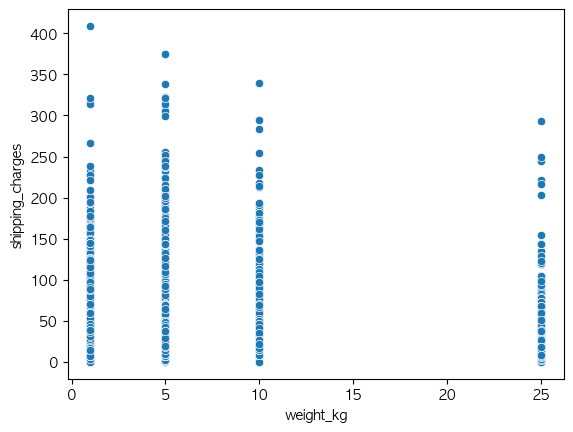

In [127]:
#   무게랑 배송비 비교 배송비가 넘 많은 경우 무게가 많이 들어서 비싼가?? 그럼 합리적인가? 보려고 - 선미
sns.scatterplot(data=marketing_delivered, x='weight_kg', y='shipping_charges')

In [128]:
# 크기, 부피 상위 90% 확인 대, 소형 구분을 위한
print(marketing_delivered['volume_cm3'].quantile([0.8, 0.9]))
print(marketing_delivered['weight_kg'].quantile([0.8, 0.9]))

0.8    172710.19
0.9    212427.42
Name: volume_cm3, dtype: float64
0.8     5.0
0.9    10.0
Name: weight_kg, dtype: float64


In [129]:
# customer_id 기준 구매 횟수 계산
purchase_counts = marketing_delivered.groupby('customer_id')['order_id'].count().reset_index()
purchase_counts.columns = ['customer_id', 'purchase_count']

# 원본 데이터프레임에 merge
marketing_delivered = marketing_delivered.merge(purchase_counts, on='customer_id', how='left')

In [130]:
# 파생 변수 컬럼 만들기
marketing_delivered['total_price'] = marketing_delivered['price'] + marketing_delivered['shipping_charges']
marketing_delivered['density'] = marketing_delivered['weight_kg'] / (marketing_delivered['volume_cm3'] / 1000000)
marketing_delivered['delivery_total_days'] = (marketing_delivered['order_delivered_timestamp'] - marketing_delivered['order_purchase_timestamp']).dt.days
marketing_delivered['delay_rate'] = marketing_delivered['delivery_delay_days'] / marketing_delivered['delivery_total_days']

# inf나 NaN 처리
marketing_delivered['delay_rate'].replace([np.inf, -np.inf], np.nan, inplace=True)
marketing_delivered['delay_rate'].fillna(0, inplace=True)

marketing_delivered['is_big_product'] = (
    (marketing_delivered['volume_cm3'] > 212427) |
    (marketing_delivered['weight_kg'] > 10)
).astype(int) # 1이면 대형 물품, 0이면 소형

/var/folders/dh/v6wj1h7d7bg8nxdblyppcb5w0000gn/T/ipykernel_57883/1703141147.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  marketing_delivered['delay_rate'].replace([np.inf, -np.inf], np.nan, inplace=True)
/var/folders/dh/v6wj1h7d7bg8nxdblyppcb5w0000gn/T/ipykernel_57883/1703141147.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

In [131]:
# Label encoding 변수 category
# category 타입을 item_cat으로 묶어 사용
marketing_delivered['item_cat'] = marketing_delivered['category1'] + '_' + marketing_delivered['category2']
# 카테고리
le = LabelEncoder()
marketing_delivered['item_cat_encoded'] = le.fit_transform(marketing_delivered['item_cat'])
# 카테고리 맵핑
category1_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(category1_mapping)

{'가구_1인가구': np.int64(0), '가구_거실장/테이블': np.int64(1), '가구_쇼파': np.int64(2), '가구_수납장/선반': np.int64(3), '가구_야외가구': np.int64(4), '가구_옷장/행거': np.int64(5), '가구_책상/책장': np.int64(6), '가구_침대': np.int64(7), '가구_화장대': np.int64(8), '스포츠용품_골프': np.int64(9), '스포츠용품_낚시': np.int64(10), '스포츠용품_등산': np.int64(11), '스포츠용품_캠핑': np.int64(12), '식품_가공식품': np.int64(13), '식품_건강식품': np.int64(14), '식품_신선식품': np.int64(15), '의류_남성의류': np.int64(16), '의류_스포츠의류': np.int64(17), '의류_여성의류': np.int64(18), '의류_유아의류': np.int64(19), '의류_파티의류': np.int64(20), '전자제품_건강가전': np.int64(21), '전자제품_냉장고': np.int64(22), '전자제품_비데': np.int64(23), '전자제품_세탁기/건조기': np.int64(24), '전자제품_음향가전': np.int64(25), '전자제품_주방가전': np.int64(26), '전자제품_청소기': np.int64(27), '화장품_남성화장품': np.int64(28), '화장품_네일케어': np.int64(29), '화장품_마스크/팩': np.int64(30), '화장품_메이크업': np.int64(31), '화장품_바디케어': np.int64(32), '화장품_선케어': np.int64(33), '화장품_스킨케어': np.int64(34), '화장품_향수': np.int64(35), '화장품_헤어케어': np.int64(36)}


In [132]:
# 마케팅 y = 1 n = 0으로 변환
marketing_delivered['marketing_info_agree'] = marketing_delivered['marketing_info_agree'].map({'y': 1, 'n': 0})

In [133]:
# 왜도 완화 및 정규화/표준화
# log로 변환할 컬럼 목록
logs_cols = [
    'shipping_charges',
    'total_price',
    'approval_delay_minutes',
    'density',
    'delivery_total_days'
]
# log에서 std로 변환할 컬럼 목록
stdlog_cols = [
    'shipping_charges', # 로그 변환했어도 여전히 수치 차이 존재. 다른 변수와 영향력 맞추기 위해 표준화 필요
    'total_price', # 구매 금액은 수천~수십만 원까지 매우 큼. 정규화 없이 쓰면 거리 계산 시 이 값 하나가 군집을 결정해버림
    'approval_delay_minutes', # 분 단위 수천까지 존재 → 평균 0, 분산 1로 맞추지 않으면 전체 거리 구조 왜곡
    'density', # 단위가 복잡하고 수치 폭 넓음. 다른 변수들과 거리 계산 시 과대반영 방지
    'delivery_total_days' # delivery_delay_days와 비슷한 값임으로 음수 양수를 포함하고 있음.
]
# std로 변환할 컬럼 목록
std_cols = [
    'payment_installments', # 대부분 1, 일부 12개월 등 극단 값 존재. 표준화 없이 쓰면 비정상적으로 그룹 나뉠 수 있음
    'delivery_delay_days', # 음수~양수 포함. 중심을 0으로 두고 표준편차 맞추면 분포가 잘 반영됨
    'delay_rate',
    'item_cat_encoded',
    'marketing_info_agree',
    'is_big_product',
    'review_score',
    'age'
]

In [134]:
for col in logs_cols:
    marketing_delivered['log_' + col] = marketing_delivered[col].apply(
        lambda x: np.log1p(x) if x > -1 else 0  # 0 값으로 대체
)

scaler = StandardScaler()
for col in stdlog_cols:
    marketing_delivered['std_' + col] = scaler.fit_transform(marketing_delivered[['log_' + col]])
for col in std_cols:
    marketing_delivered['std_' + col] = scaler.fit_transform(marketing_delivered[[col]])

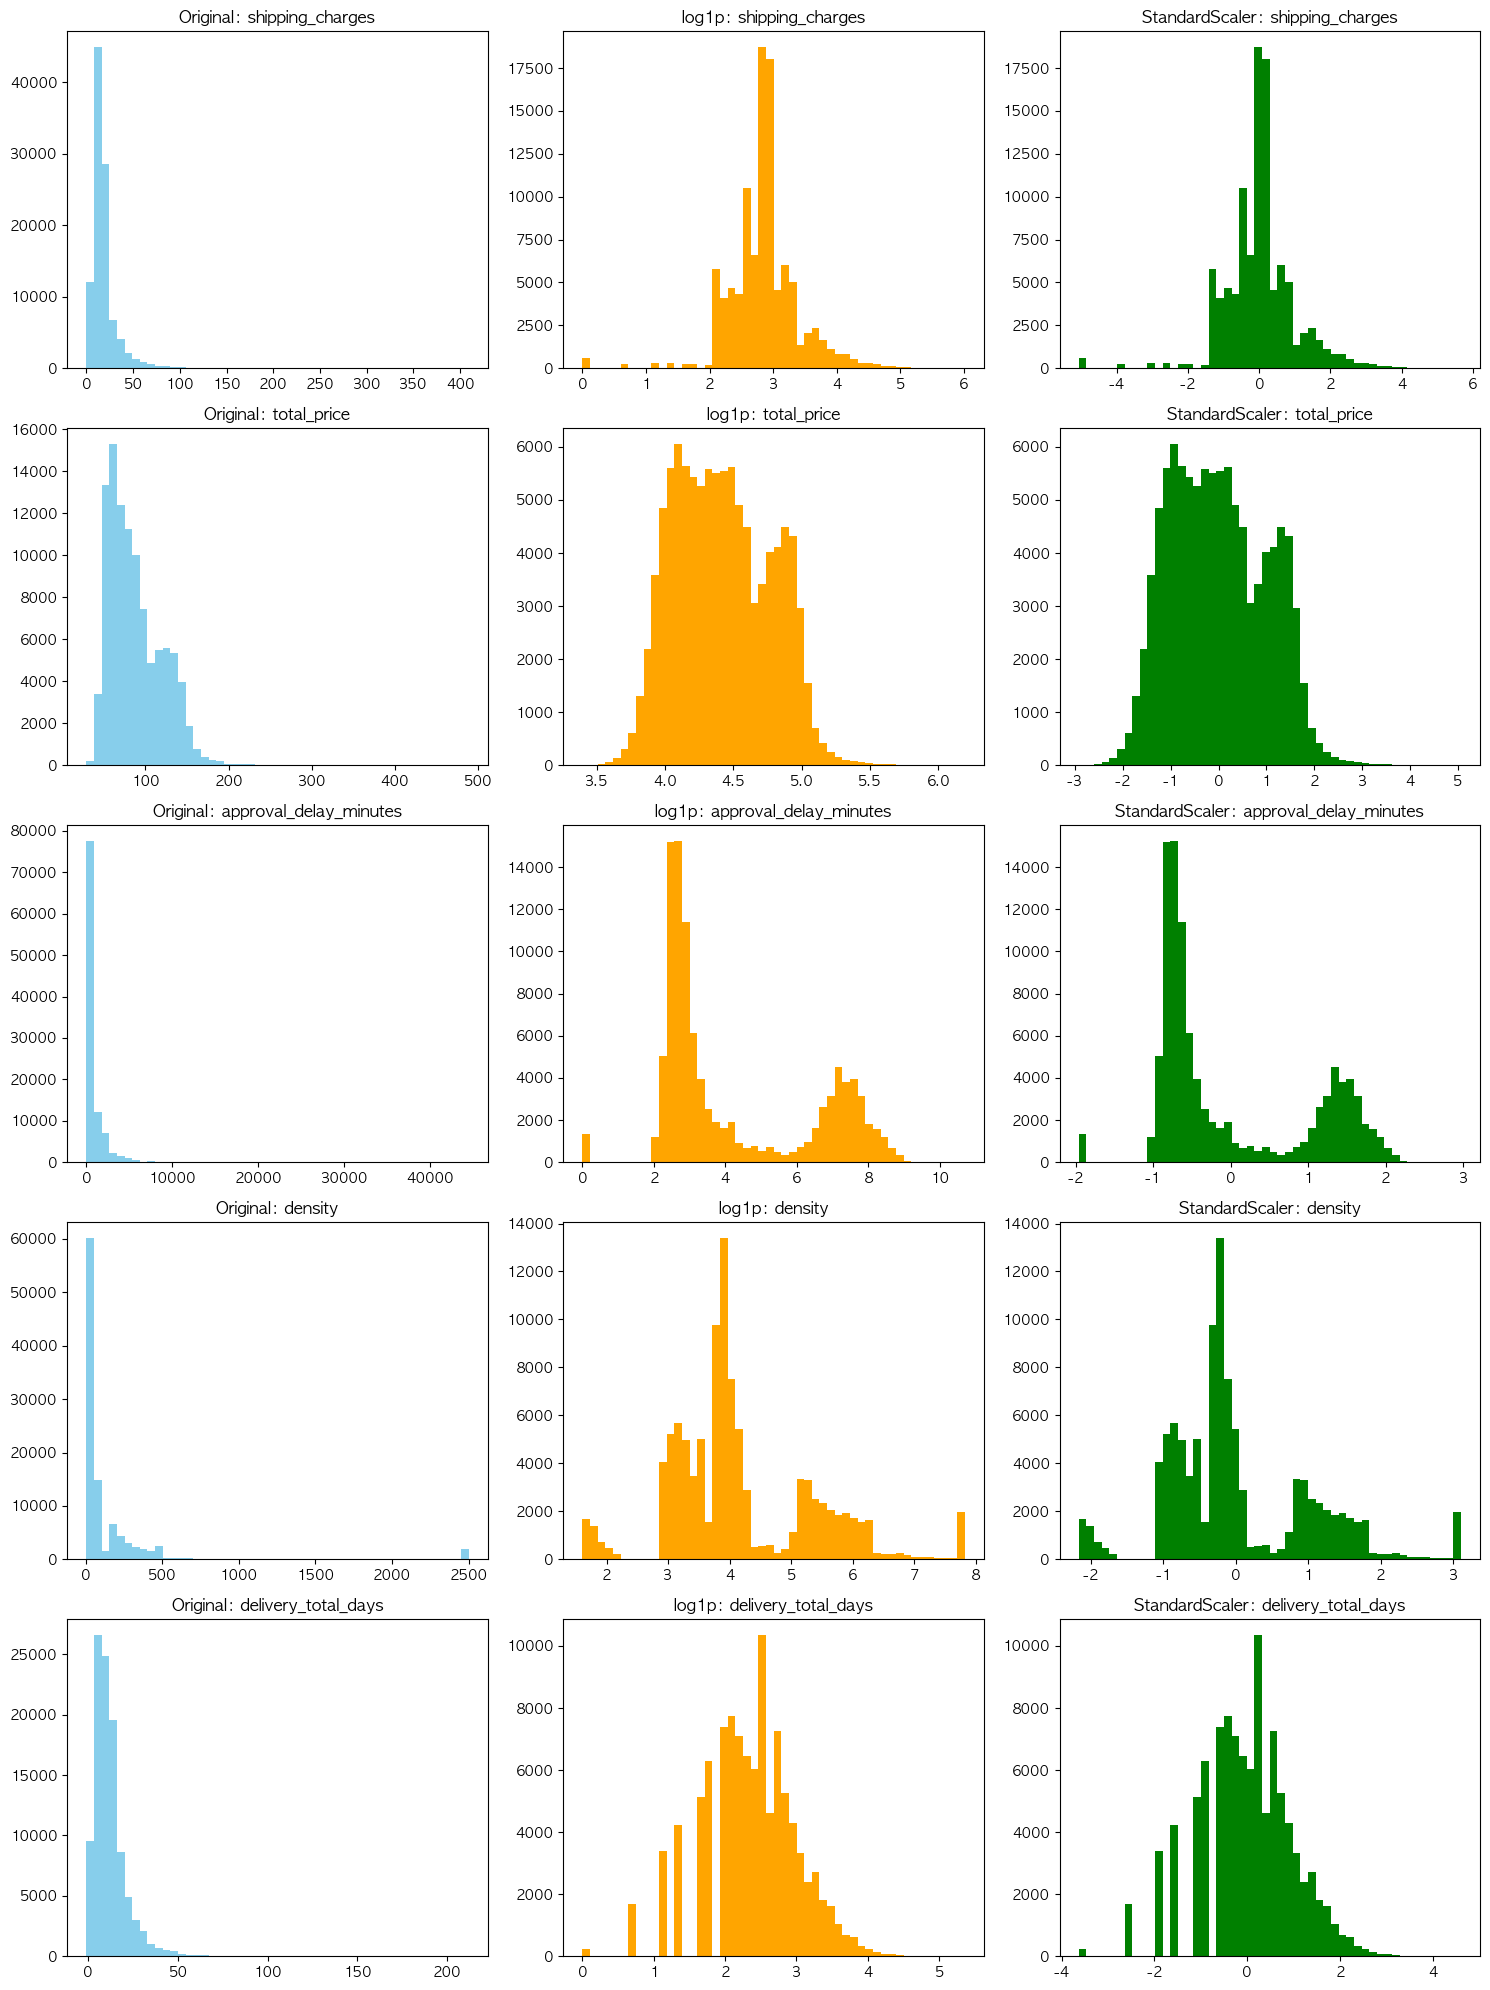

In [135]:
# 차트로 시각화 (로그 전/후, 표준화 전/후 비교)
# 표준화는 거리 기반 계산을 위한 스케일 통일 목적
fig, axes = plt.subplots(len(logs_cols), 3, figsize=(15, 4 * len(logs_cols)))

for i, col in enumerate(logs_cols):
    # 원본
    axes[i, 0].hist(marketing_delivered[col].dropna(), bins=50, color='skyblue')
    axes[i, 0].set_title(f"Original: {col}")

    # 로그 변환
    axes[i, 1].hist(marketing_delivered['log_' + col].dropna(), bins=50, color='orange')
    axes[i, 1].set_title(f"log1p: {col}")

    # 표준화
    if col in stdlog_cols:
        axes[i, 2].hist(marketing_delivered['std_' + col].dropna(), bins=50, color='green')
        axes[i, 2].set_title(f"StandardScaler: {col}")
    else:
        axes[i, 2].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# 목적별 클러스터링용 데이터프레임 생성
# 1_소비 성향 기반 행동 클러스터_미주 (목표: "서로 다른 구매 성향/패턴을 가진 고객들을 그룹화") / 고가/저가 구매자, 리뷰 불만족 고객 등 분류 가능
df_behavior = marketing_delivered[[
    'std_total_price',
    'std_shipping_charges',
    'std_payment_installments',
    'std_marketing_info_agree',
    'std_age',
    'std_review_score'
]]

# 2_배송 민감도 기반 경험 클러스터_인재 (목표: "배송 지연·체감 품질에 따른 고객 분류") / 배송 민감군 , 여유로운 고객 , 저평가 리뷰 유저 등 분류 가능
df_experience = marketing_delivered[[
    'std_delivery_delay_days',
    'std_delivery_total_days',
    'std_approval_delay_minutes',
    'std_delay_rate',
    'std_review_score'
]]

# 3_제품 특성 기반 클러스터_선미 (목표: "구매 제품 유형에 따라 고객을 나눔") / 고가·대형 상품 구매자 , 소형·저가 구매자 등 분류 가능
df_product = marketing_delivered[[
    'std_density',
    'std_total_price',
    'std_is_big_product',
    'std_item_cat_encoded',
    'std_review_score'
]]

# 4_혼합 클러스터_상규 (고객 행동 + 배송 경험 + 제품 특성 통합 군집화) / 마케팅 타겟팅, CS 우선 대응, 리텐션 전략에 활용 가능
df_mixed = marketing_delivered[[
    'std_total_price',
    'std_approval_delay_minutes',
    'std_delivery_delay_days',
    'std_delay_rate',
    'std_is_big_product',
    'std_item_cat_encoded',
    'std_density',
    'std_payment_installments',
    'std_marketing_info_agree',
    'std_age',
    'std_review_score'
]]

* 3. 제품 특성 기반 군집
* 목표: "구매 제품 유형에 따라 고객을 나눔"
* 핵심 변수: weight_kg, volume_cm3, price

* → 고가·대형 상품 구매자 vs 소형·저가 구매자

In [ ]:
# # 스탠스스케일링으로 표준화 해주기 표준화 이미 함 
# X = df_product[['std_density', 'std_total_price']]
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [ ]:
# 실행 주의 17분 걸림 실루엣-선미
'''from sklearn.metrics import silhouette_score
silhouette_scores = []
k_range = range(2, 11)  # k=1은 silhouette score 계산 불가

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    score = silhouette_score(X_scaled, labels)
    silhouette_scores.append(score)

plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette Score') 
plt.show()'''


"silhouette_scores = []\nk_range = range(2, 11)  # k=1은 silhouette score 계산 불가\n\nfor k in k_range:\n    kmeans = KMeans(n_clusters=k, random_state=42)\n    kmeans.fit(X_scaled)\n    labels = kmeans.labels_\n    score = silhouette_score(X_scaled, labels)\n    silhouette_scores.append(score)\n\nplt.plot(k_range, silhouette_scores, marker='o')\nplt.xlabel('k')\nplt.ylabel('Silhouette Score') \nplt.show()"

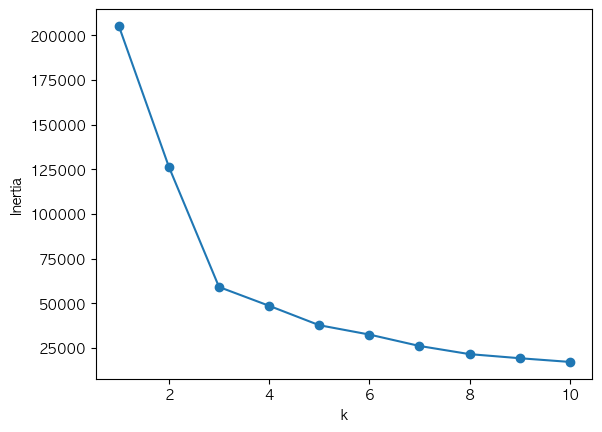

In [142]:
# 엘보우
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [143]:
k = 3  # 예: elbow에서 결정한 값
kmeans = KMeans(n_clusters=k, random_state=42)
df_product['cluster'] = kmeans.fit_predict(X_scaled)


/var/folders/dh/v6wj1h7d7bg8nxdblyppcb5w0000gn/T/ipykernel_57883/657317039.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product['cluster'] = kmeans.fit_predict(X_scaled)


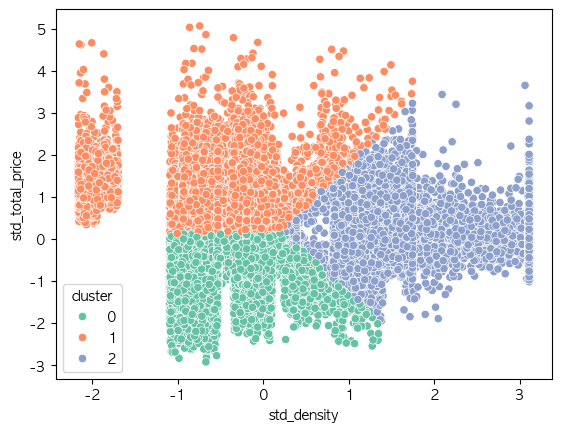

In [144]:
#제품 특성 기반 클러스터링 결과
sns.scatterplot(x='std_density', y='std_total_price', hue='cluster', data=df_product, palette='Set2')
plt.show()


In [145]:
#### 3개로 나누는걸로 선택!###밀도와 가격 낮은거, 밀도는 낮은데 금액이 높은거, 금액은 보통인데 밀도가 높은거 
# 2개로 나누면 밀도 낮고 저가 제품, 밀도 높고 고가 제품
# 군집화 한 3가지 군집에서 카테고리별로 마케팅 제시하기 좋게 어떤 카테고리들이 포함되어있는지 확인해보기 


/var/folders/dh/v6wj1h7d7bg8nxdblyppcb5w0000gn/T/ipykernel_57883/2411654777.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_product['cluster'] = kmeans.fit_predict(X_scaled)


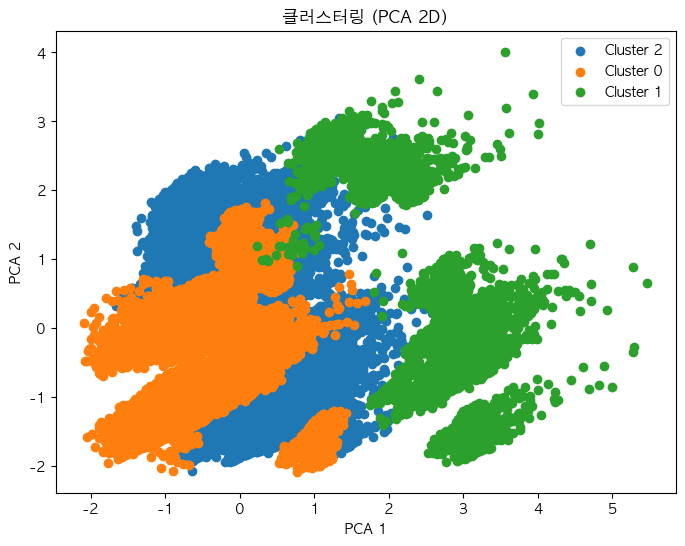

In [ ]:

# 5개 변수 선택
X = df_product[[ 
    'std_density',
    'std_total_price',
    'std_is_big_product',
    'std_item_cat_encoded',
    'std_review_score'
]]

# 클러스터링
kmeans = KMeans(n_clusters=3, random_state=42)
df_product['cluster'] = kmeans.fit_predict(X_scaled)

# PCA로 2D 시각화
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))

# 군집별로 반복하면서 점 찍고 범례 추가
for cluster_num in df_product['cluster'].unique():
    mask = df_product['cluster'] == cluster_num
    plt.scatter(
        X_pca[mask, 0], 
        X_pca[mask, 1], 
        label=f'Cluster {cluster_num}'
    )

plt.title("클러스터링 (PCA 2D)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

In [186]:
df_product.groupby('cluster').mean()

,std_density,std_total_price,std_is_big_product,std_item_cat_encoded,std_review_score
cluster,,,,,
0,-0.524491,-0.639429,-0.390309,-0.484267,-0.002298
1,-0.295991,1.215453,2.560330,0.314803,-0.009247
2,0.667170,0.310655,-0.390309,0.428448,0.005459


In [148]:
# LTV란?
# LTV (Customer Lifetime Value, 고객 생애 가치) : 한 고객이 우리와 거래하면서 예상되는 총 수익
df_merged = marketing_delivered.copy()
df_merged['cluster'] = df_product['cluster'].values

ltv_df = df_merged.groupby('cluster').agg(
    total_ltv=('total_price', 'sum'),  # 총 구매 금액
    avg_ltv=('total_price', 'mean'),   # 구매 1건당 평균 금액
    purchase_count=('order_id', 'count'),  # 총 구매건수
    unique_customers=('customer_id', 'nunique')  # 고객 수
).reset_index()

# 고객당 평균 LTV 및 재구매율
ltv_df['ltv_per_customer'] = ltv_df['total_ltv'] / ltv_df['unique_customers']
ltv_df['repurchase_rate'] = ltv_df['purchase_count'] / ltv_df['unique_customers']

ltv_df

,cluster,total_ltv,avg_ltv,purchase_count,unique_customers,ltv_per_customer,repurchase_rate
0,0,2845474.47,61.534416,46242,43349,65.641064,1.066737
1,1,3865257.14,126.006753,30675,29325,131.807575,1.046036
2,2,2271708.29,88.396758,25699,24476,92.813707,1.049967


# 군집별 해석
### 군집 0
* 밀도: 낮음
* 가격: 낮음
* 대형물품: 아님
* 카테고리: 평균 이하
* 리뷰점수: 평균과 비슷
* 특징: 소형·저가 상품을 구매하는 고객.
→ 저렴한 제품 위주의 ‘가성비형’ 고객으로 해석 가능.

### 군집 1
* 밀도: 조금 낮음
* 가격: 매우 높음
* 대형물품: 매우 큼
* 카테고리: 평균 이상
* 리뷰점수: 평균과 비슷
* 특징: 대형·고가 상품을 주로 구매하는 고객.
→ 프리미엄 상품을 선호하는 ‘고가형’ 고객.

### 군집 2
* 밀도: 높음
* 가격: 조금 높음
* 대형물품: 아님
* 카테고리: 평균 이상
* 리뷰점수: 평균과 비슷
* 특징: 중가·고밀도 제품을 선호.
→ ‘중간 가격대 + 다양한 카테고리’ 고객군.

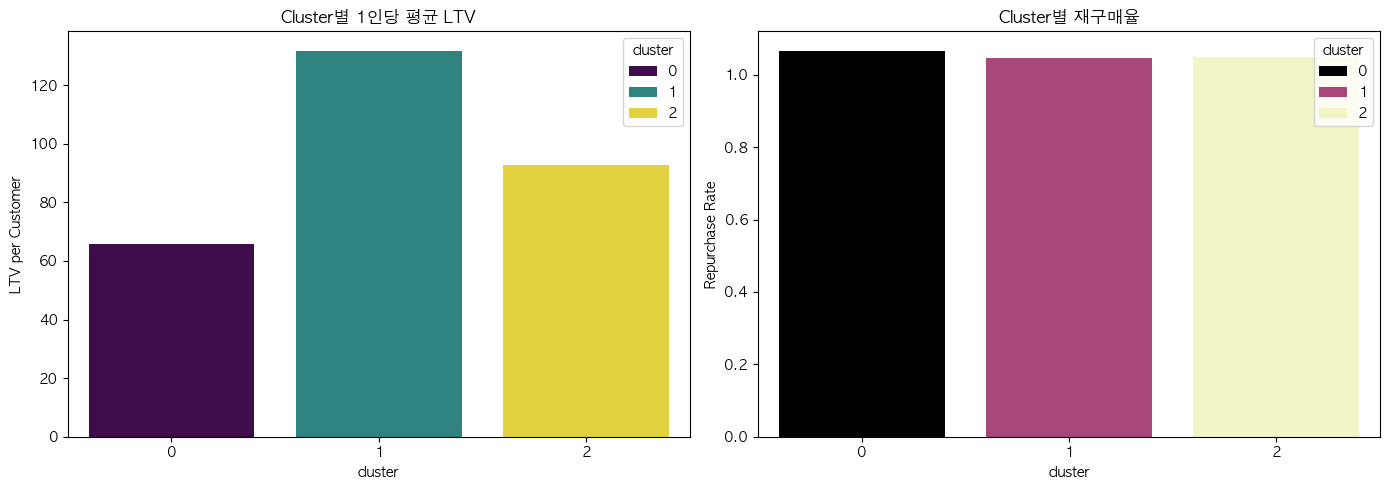

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# LTV per customer 시각화
sns.barplot(data=ltv_df, x='cluster', y='ltv_per_customer', hue='cluster', ax=axes[0], palette='viridis')
axes[0].set_title('Cluster별 1인당 평균 LTV')
axes[0].set_ylabel('LTV per Customer')
axes[0].set_xlabel('cluster')

# 재구매율 시각화
sns.barplot(data=ltv_df, x='cluster', y='repurchase_rate', hue='cluster', ax=axes[1], palette='magma')
axes[1].set_title('Cluster별 재구매율')
axes[1].set_ylabel('Repurchase Rate')
axes[1].set_xlabel('cluster')

plt.tight_layout()
plt.show()

In [150]:
import matplotlib as mpl
mpl.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False

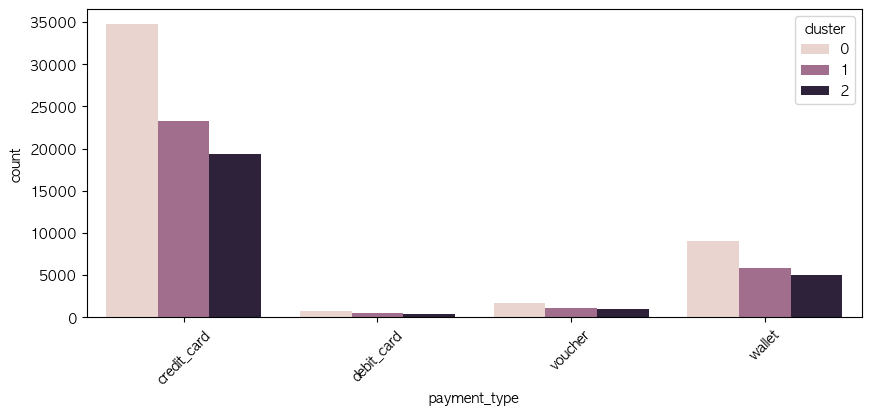

In [ ]:
new_df = pd.DataFrame(
    pd.DataFrame(
        df_product.groupby('payment_type')["cluster"].value_counts().reset_index()))
plt.figure(figsize=(10,4))
sns.barplot(
    x='payment_type', 
    y='count', 
    hue='cluster', 
    data=new_df
)
plt.xticks(rotation=45)
plt.show()
# 신용카드를 가장많이 사용하고 다음으로 페이 캐쉬 
# 상관없는듯


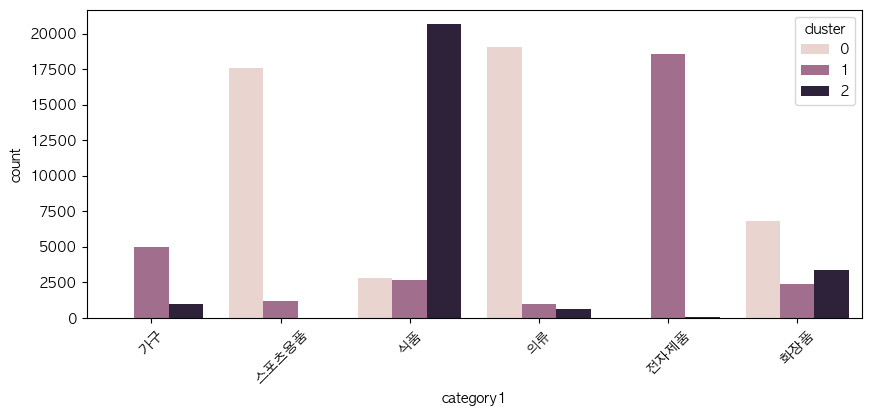

In [ ]:
new_df = pd.DataFrame(
    pd.DataFrame(
        df_product.groupby('category1')["cluster"].value_counts().reset_index()))
plt.figure(figsize=(10,4))
sns.barplot(
    x='category1', 
    y='count', 
    hue='cluster', 
    data=new_df
)
plt.xticks(rotation=45)
plt.show()
# 1로 봐도 0군집이 활동적인 사람인가? 1군집은 확실히 집에서 사용하는 전자제품과 가구가 눈에 띄게 높고 2군집은 화장품이 높다 식품은 당연히 구매하는듯 먹고 살아야지
# 킵
# 전처리 한 후 2군집에서 식품이 눈에 띄게 증가 화장품도 많이 구매함
# 0군집 의류 스포츠용품을 많이 구매 활동적인 사람으로 추정
# 1군집은 전자제품 가구등 집에서 사용하는 제품 많이 구매

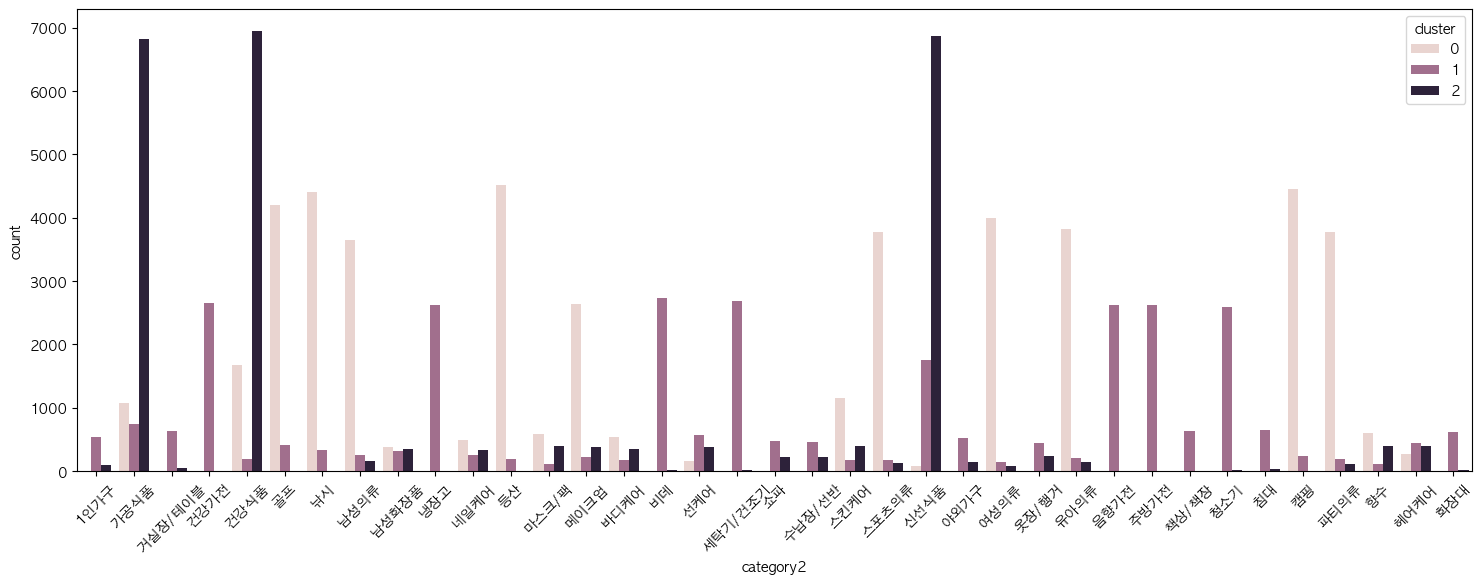

In [ ]:
new_df = pd.DataFrame(
    pd.DataFrame(
        df_product.groupby('category2')["cluster"].value_counts().reset_index()))
plt.figure(figsize=(18,6))
sns.barplot(
    x='category2', 
    y='count', 
    hue='cluster', 
    data=new_df
)
plt.xticks(rotation=45)
plt.show()
# 킵

In [ ]:
# 0군집 즉 밀도가 낮고 가격이 낮은 가성비제품을 구매하는 구매층들은 가공식품, 건강가전, 골프, 낚시 스포츠의류, 야외가구, 옷장, 캠핑, 파티의류등을 주로 많이 구매했으며
# 1군집 즉 밀도가 낮고 가격이 높은 제품을 구매하는 고객층은 거실장, 냉장고, 비데 세타기, 신선식품, 유아의류, 음향가전, 주방가전, 청소기 등을 많이 구매했다
# 2군집은 밀도가 높고 가격이 낮은 제품을 구매한는 고객층은 눈에 띄게 적은 수치를 보였고 주로 화장품이나 케어제품을 많이 구매하였다
# 1 군집은 가격에 민감하지 않는 프리미엄 구매자로 예상하여 마케팅 타겟팅할 가치가 높을것으로 생각함
# 0 군집은 가성비제품 즉 가격이 합리적이고 실용적인 제품을 선호하는것으로 예상하고 가성비제품을 마케팅하면 타켓팅 가치가 높을것으로 생각함 
# 활동적인 사람 즉 외향적인사람이 0군집에 많이 분포되어있다 1군집은 가전제품, 생활용품등을 많이 구매하는 내향적인 사람으로 추측, 2군집은 화장품류를 많이 구매함 
# 중간정도 크기 제품 많이 구매함                     무거운 가전제품 많이 구매                                   가벼운 화장품류 많이 구매 

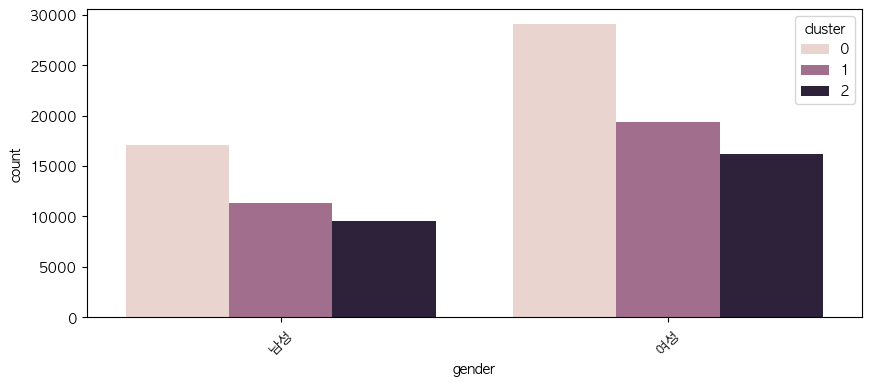

In [ ]:
new_df = pd.DataFrame(
    pd.DataFrame(
        df_product.groupby('gender')["cluster"].value_counts().reset_index()))
plt.figure(figsize=(10,4))
sns.barplot(
    x='gender', 
    y='count', 
    hue='cluster', 
    data=new_df
)
plt.xticks(rotation=45)
plt.show()
# 전체적으로 봤을떄 여성 사용자가 각 군집마다 여성이 2배정도 더많다 
# 사용안할듯 

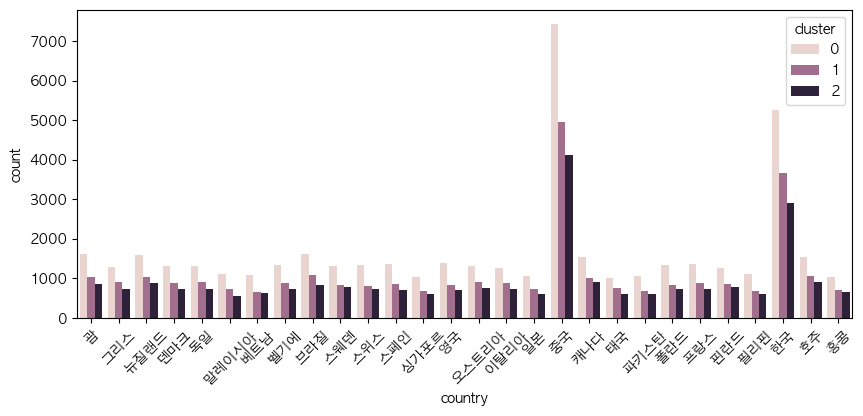

In [ ]:
new_df = pd.DataFrame(
    pd.DataFrame(
        df_product.groupby('country')["cluster"].value_counts().reset_index()))
plt.figure(figsize=(10,4))
sns.barplot(
    x='country', 
    y='count', 
    hue='cluster', 
    data=new_df
)
plt.xticks(rotation=45)
plt.show()
# 나라별로 봤을떄 중국과 한국 구매자가 많다 
# 다 비슷할듯 

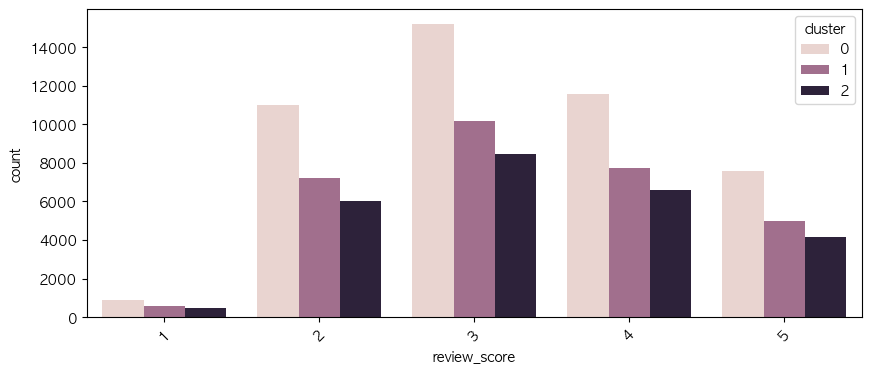

In [ ]:
new_df = pd.DataFrame(
    pd.DataFrame(
        df_product.groupby('review_score')["cluster"].value_counts().reset_index()))
plt.figure(figsize=(10,4))
sns.barplot(
    x='review_score', 
    y='count', 
    hue='cluster', 
    data=new_df
)
plt.xticks(rotation=45)
plt.show()
# 리뷰는 3점이 제일 많고 1점이 적다 코팡에서 상품을 구매했을떄 어느정도 만족한거 같다
# 상관없을 듯

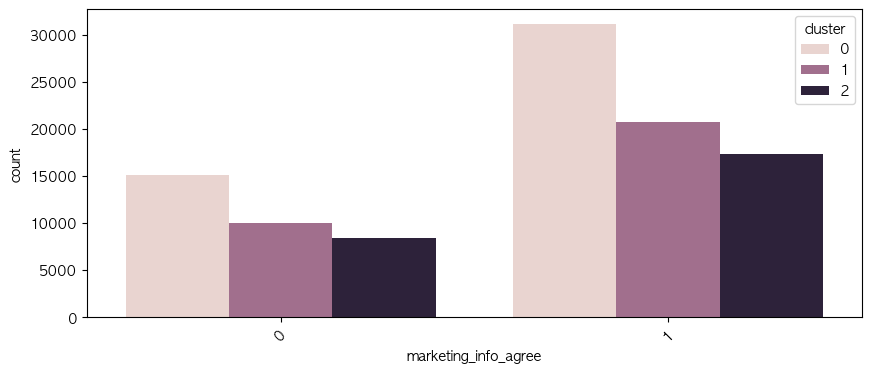

In [ ]:
new_df = pd.DataFrame(
    pd.DataFrame(
        df_product.groupby('marketing_info_agree')["cluster"].value_counts().reset_index()))
plt.figure(figsize=(10,4))
sns.barplot(
    x='marketing_info_agree', 
    y='count', 
    hue='cluster', 
    data=new_df
)
plt.xticks(rotation=45)
plt.show()
# 마케팅 정보 동의에 동의를 누른 사람은 군집 동일하게 2배정도 차이가 났다
# 잘 안볼긋 

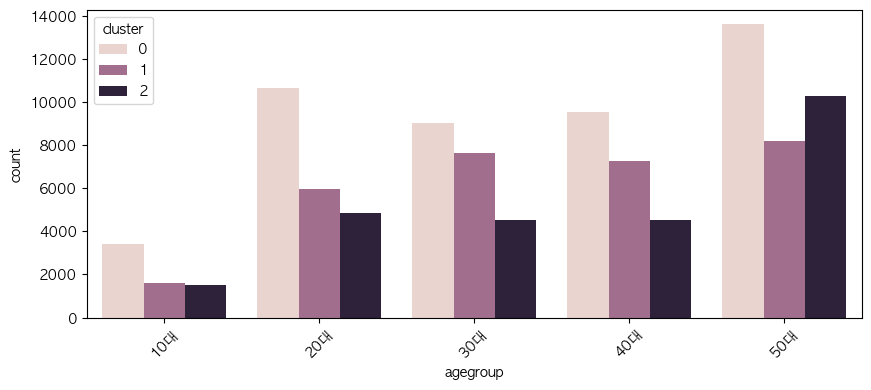

In [ ]:
new_df = pd.DataFrame(
    pd.DataFrame(
        df_product.groupby('agegroup')["cluster"].value_counts().reset_index()))
plt.figure(figsize=(10,4))
sns.barplot(
    x='agegroup', 
    y='count', 
    hue='cluster', 
    data=new_df
)
plt.xticks(rotation=45)
plt.show()
# 50대의 사용자가 눈에 띄게 많고 0군집에 많이 분포되어있다 2, 3, 40대는 비슷한 결과가 나오고 0군집에 속한 사람은 많지많 1군집은 가격이 높은 제품을 주로 구매하기 떄문애 적을수도?
# ##########비율로 보자 ######## 실루엣 수? 한번 보라는데 뭐더라...

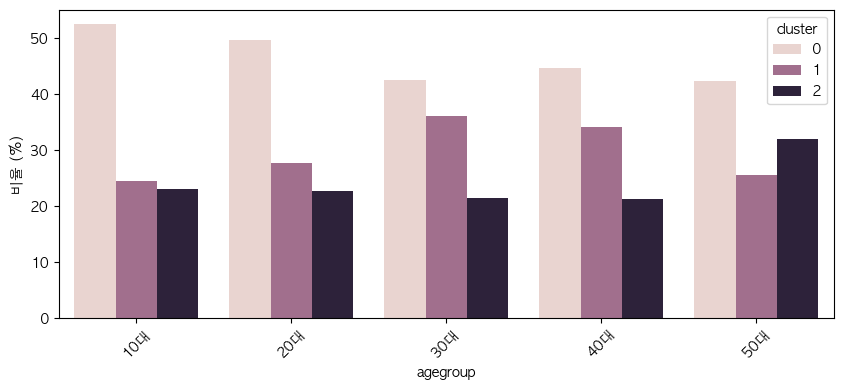

In [ ]:
# 1. 연령대별 군집별 카운트 집계
counts = df_product.groupby('agegroup')['cluster'].value_counts().reset_index()
counts.columns = ['agegroup', 'cluster', 'count']

# 2. 연령대별 총합 계산
totals = counts.groupby('agegroup')['count'].transform('sum')

# 3. 비율 계산
counts['ratio'] = counts['count'] / totals * 100

# 4. barplot 그리기
plt.figure(figsize=(10, 4))
sns.barplot(
    x='agegroup',
    y='ratio',
    hue='cluster',
    data=counts
)

plt.ylabel('비율 (%)')
plt.xticks(rotation=45)
plt.show()
# 비율로 확인해본결과 0군집이 주로 4~50퍼센트를 차지하고 10~40대는 1군집이 다음으로 많지만 50대는 식품이나 화장품을 많이 구매하는 2군집이 다음으로 많았다

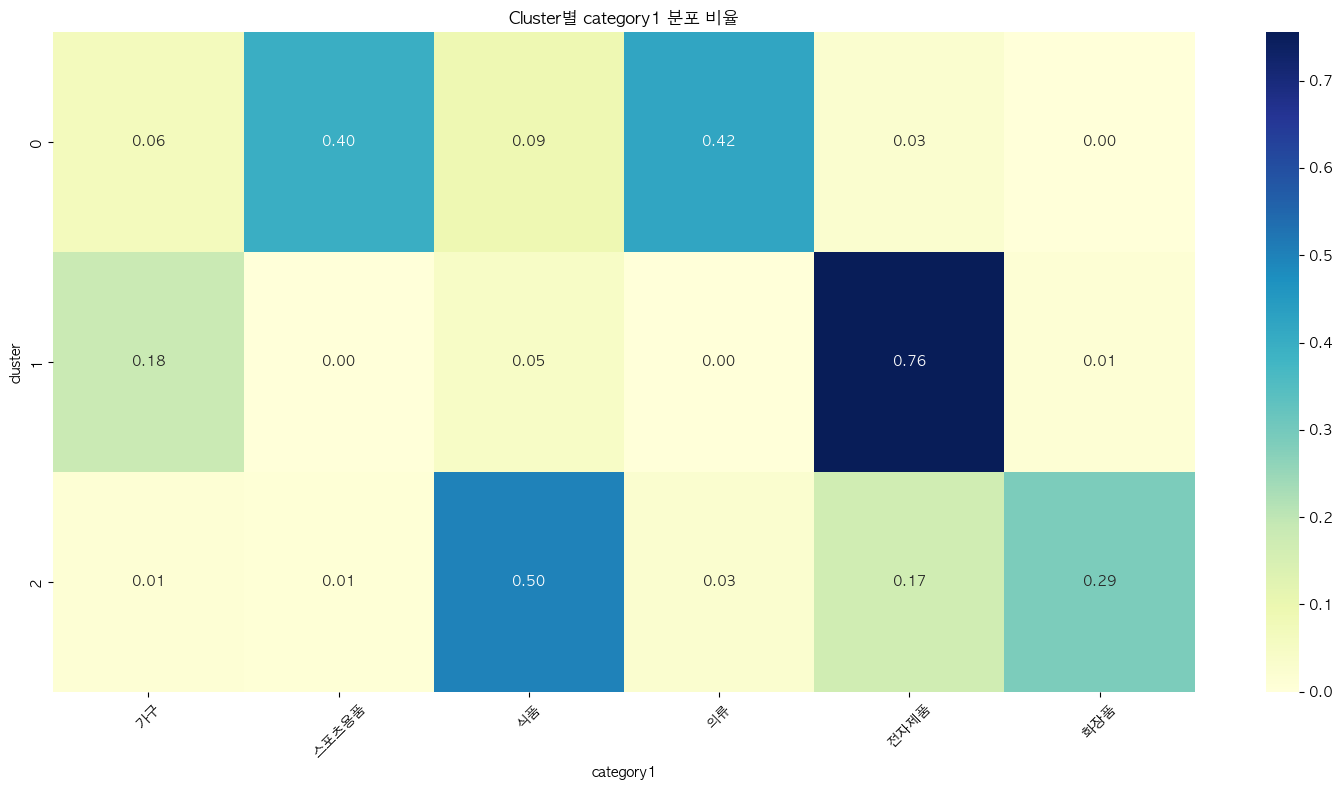

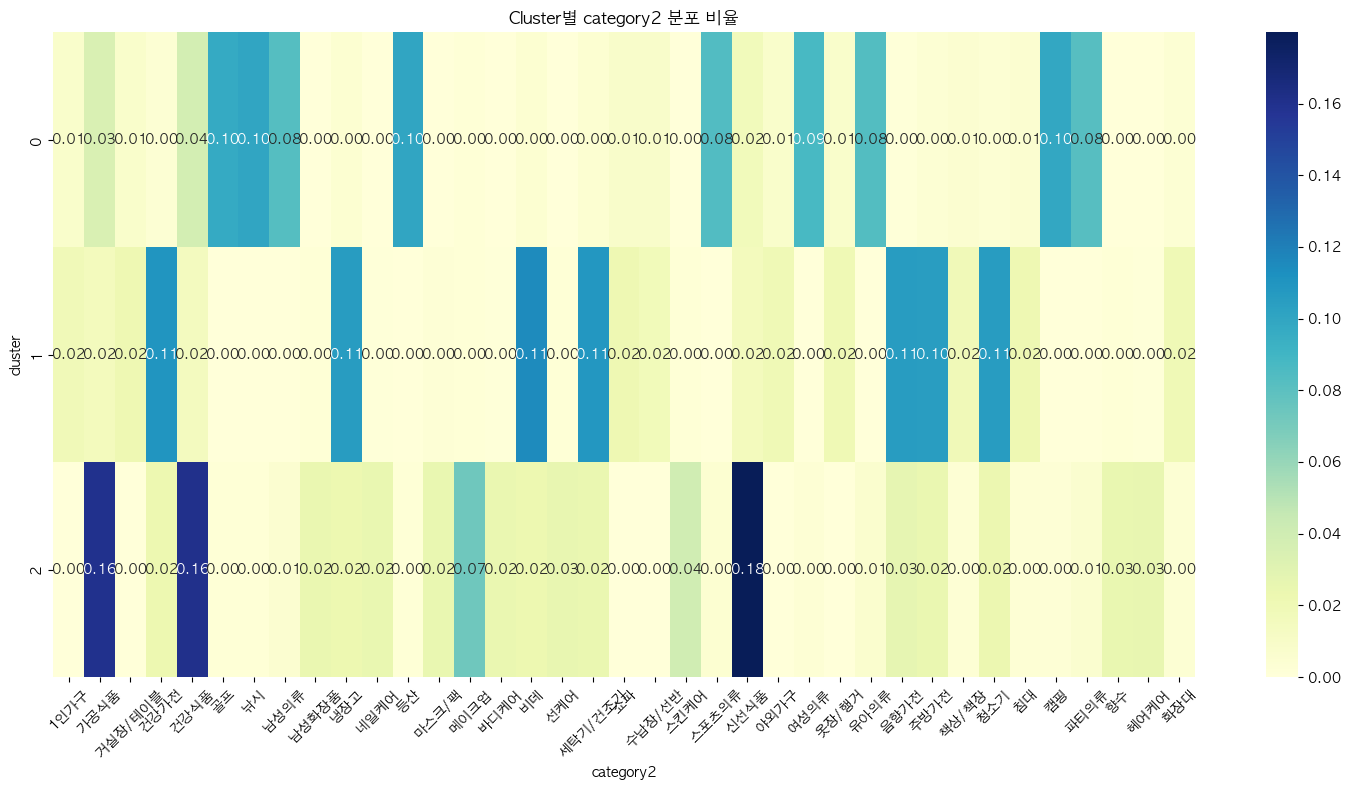

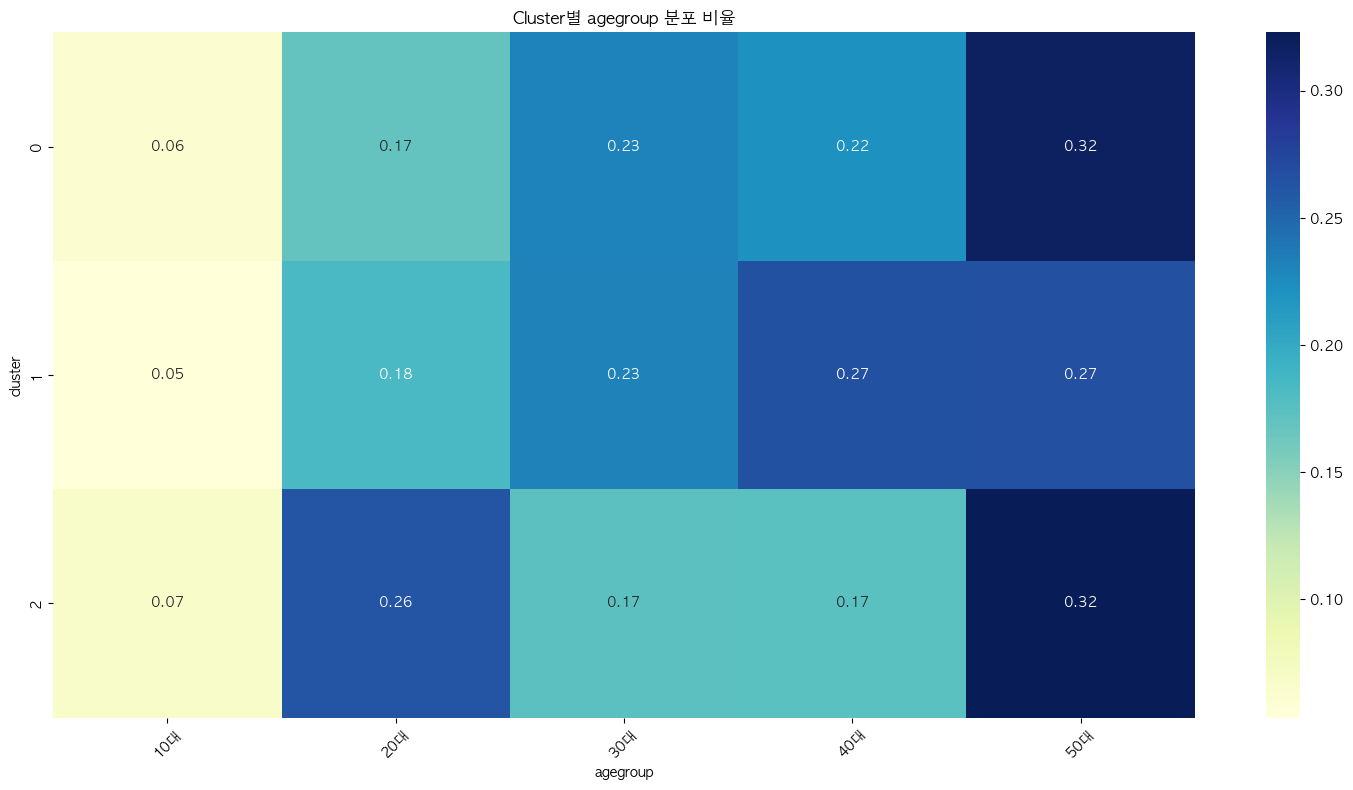

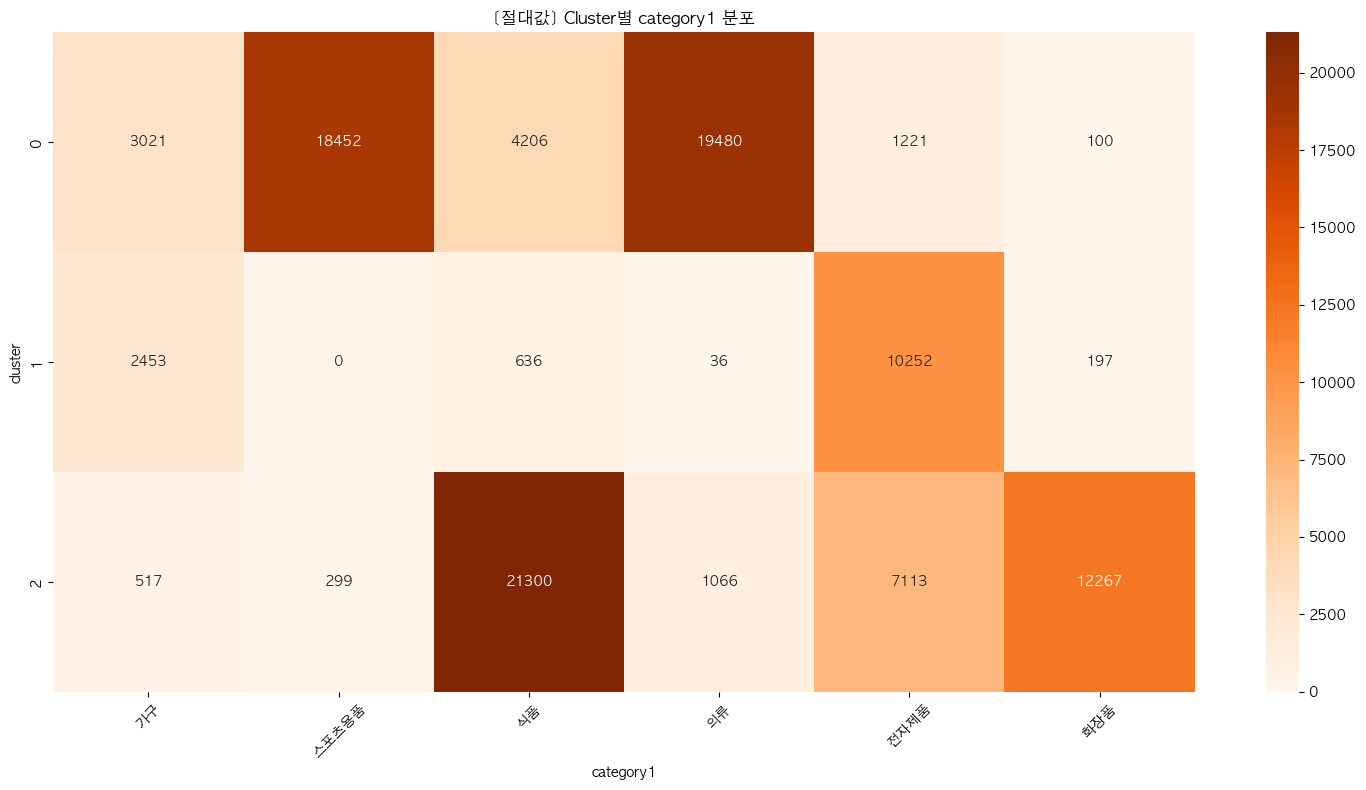

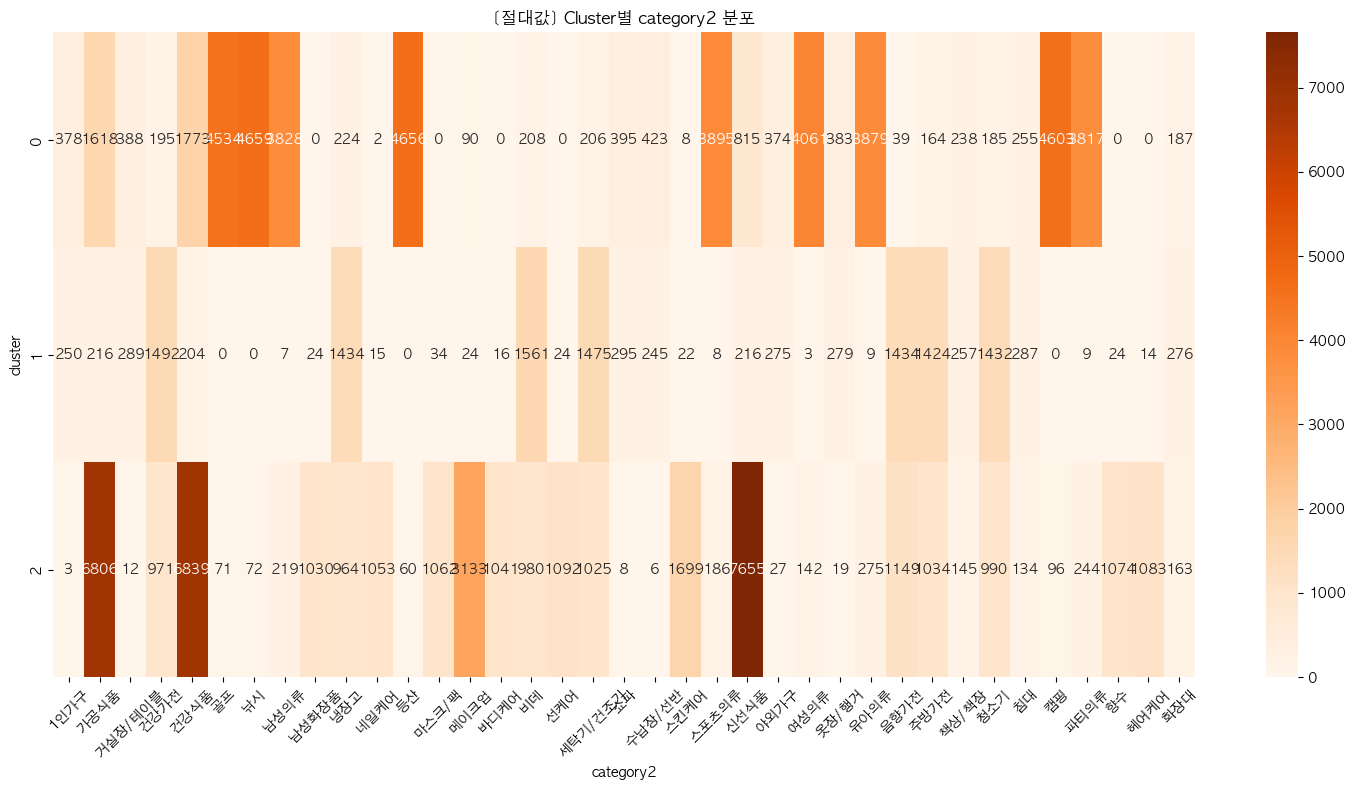

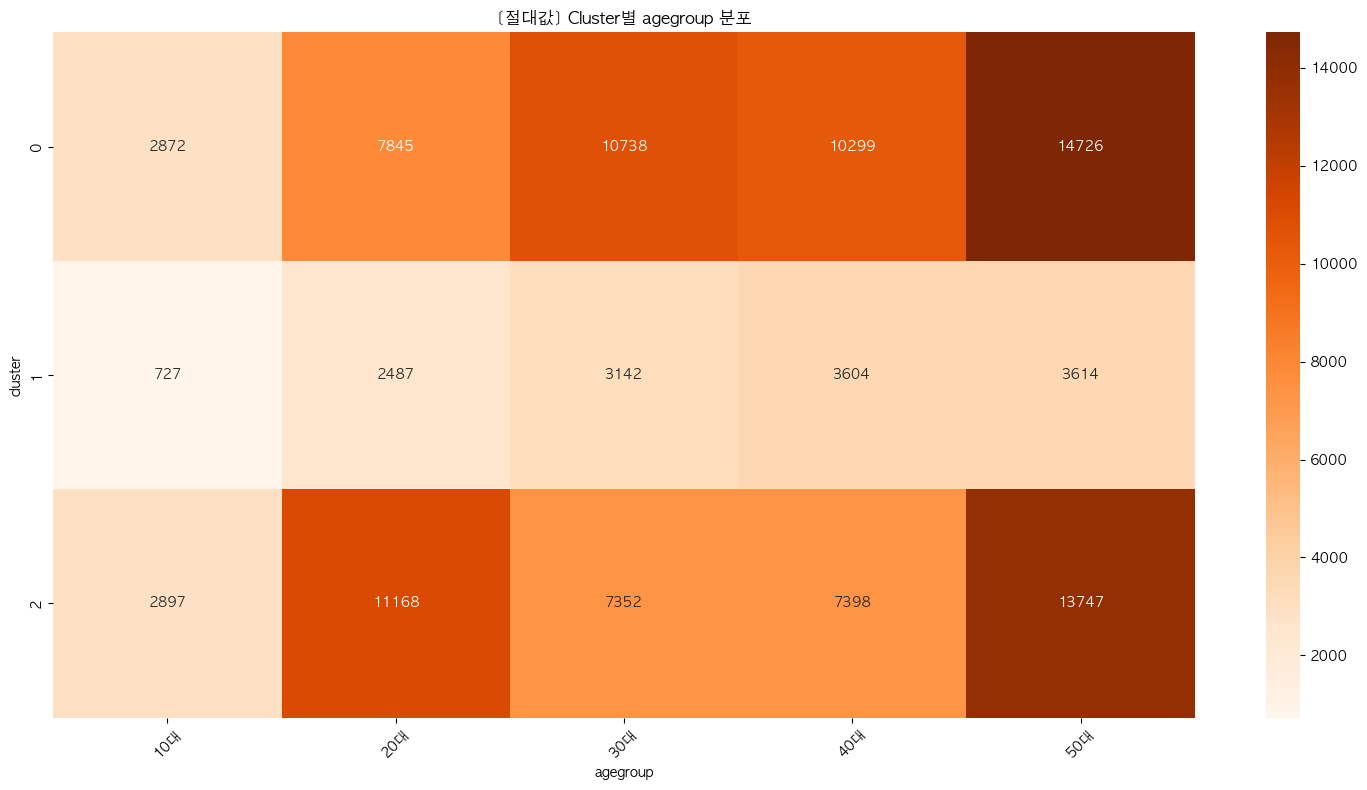

In [ ]:
# payment_type category1 category2 gender country review_score marketing_info_agree agegroup
# 클러스터 라벨 붙여진 df_product 기준으로 병합
df_merged = marketing_delivered.copy()
df_merged['cluster'] = df_product['cluster'].values

cols = [
    'category1', 'category2','agegroup'
]

for col in cols:
    ct = pd.crosstab(df_merged['cluster'], df_merged[col], normalize='index')
    plt.figure(figsize=(15, 8))
    sns.heatmap(ct, annot=True, fmt=".2f", cmap='YlGnBu')
    plt.title(f'Cluster별 {col} 분포 비율')
    plt.ylabel('cluster')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# for col in cols:
#     ct = pd.crosstab(df_merged['cluster'], df_merged[col])
#     plt.figure(figsize=(15, 8))
#     sns.heatmap(ct, annot=True, fmt="d", cmap='Oranges')
#     plt.title(f'[절대값] Cluster별 {col} 분포')
#     plt.ylabel('cluster')
#     plt.xlabel(col)
#     plt.xticks(rotation=45)
#     plt.tight_layout()
#     plt.show()